# Marketing analytics for a large e-commerce shop

I've been offered an internship in the analytical department of a large e-commerce store. My first task is to help optimize marketing expenses.

I have:
- Server logs with data on site visits from June 2017 through May 2018
- Dump file with all orders for the period
- Marketing expenses statistics

I'm going to study:
- How people use the product
- When they start to buy
- How much money each customer brings
- When they pay off

### Step 1: Open data files & look at general info <a name="step_1"></a>

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms
import seaborn as sns

In [2]:
# try-except blocks handle errors that occur from changing file directories

try:
    visits = pd.read_csv('visits_log_us.csv')
except:
    visits = pd.read_csv('/datasets/visits_log_us.csv')

try:
    orders = pd.read_csv('orders_log_us.csv')
except:
    orders = pd.read_csv('/datasets/orders_log_us.csv')

try:
    costs = pd.read_csv('costs_us.csv')
except:
    costs = pd.read_csv('/datasets/costs_us.csv')

In [3]:
# print head for 'visits' DataFrame

visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
# print head for 'orders' DataFrame

orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [5]:
# print head for 'costs' DataFrame

costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [6]:
# print some descriptive statistics for data

new_dfs = ['visits', 'orders', 'costs']

for new_df in new_dfs:
    print('------- ' + new_df.upper() + ' STATS -------')
    exec('print(' + new_df + '.describe())')
    print('')
    print('')

------- VISITS STATS -------
           Source Id           Uid
count  359400.000000  3.594000e+05
mean        3.750515  9.202557e+18
std         1.917116  5.298433e+18
min         1.000000  1.186350e+13
25%         3.000000  4.613407e+18
50%         4.000000  9.227413e+18
75%         5.000000  1.372824e+19
max        10.000000  1.844668e+19


------- ORDERS STATS -------
            Revenue           Uid
count  50415.000000  5.041500e+04
mean       4.999647  9.098161e+18
std       21.818359  5.285742e+18
min        0.000000  3.135781e+14
25%        1.220000  4.533567e+18
50%        2.500000  9.102274e+18
75%        4.890000  1.368290e+19
max     2633.280000  1.844617e+19


------- COSTS STATS -------
         source_id        costs
count  2542.000000  2542.000000
mean      4.857199   129.477427
std       3.181581   156.296628
min       1.000000     0.540000
25%       2.000000    21.945000
50%       4.000000    77.295000
75%       9.000000   170.065000
max      10.000000  1788.280000



In [7]:
# print general information

for new_df in new_dfs:
    print('------- ' + new_df.upper() + ' INFO -------')
    exec('print(' + new_df + '.info())')
    print('')
    print('')

------- VISITS INFO -------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None


------- ORDERS INFO -------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None


------- COSTS INFO -------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (to

### Conclusion <a name="step_1_conclusion"></a>

After our initial overview of the data, we can see there are a few problems that we should fix before proceeding.
- Column names in the **'visits'** and **'orders'** DataFrames need to be reformatted to lowercase and spaces changed to underscores
- All timestamps need to be changed from the *object* to *datetime* data type
- We can save memory by changing *int* and *float* types the their optimal subtypes

### Step 2: Data preprocessing <a name="step_2"></a>

#### Changing column names

In [8]:
# reformat column names for 'visits' & 'orders'

visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
orders.columns = ['buy_ts', 'revenue', 'uid']

#### Changing data types <a name="step_2_2"></a>

In [9]:
# change dates in 'visits' to datetime dtype

visits['end_ts'] = visits['end_ts'].astype('datetime64[m]')
visits['start_ts'] = visits['start_ts'].astype('datetime64[m]')

In [10]:
# change 'source_id' in 'visits' to uint8 (0 to 255)

visits['source_id'] = visits['source_id'].astype('uint8')

In [11]:
# change dates in 'orders' to datetime dtype

orders['buy_ts'] = orders['buy_ts'].astype('datetime64[m]')

In [12]:
# change date in 'costs' to datetime dtype

costs['dt'] = costs['dt'].astype('datetime64[D]')

In [13]:
# change 'source_id' in 'costs' to uint8 (0 to 255)

costs['source_id'] = costs['source_id'].astype('uint8')

In [14]:
# check final results after changing data types

for new_df in new_dfs:
    print('------- ' + new_df.upper() + ' INFO -------')
    exec('print(' + new_df + '.info())')
    print('')
    print('')

------- VISITS INFO -------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  uint8         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), object(1), uint64(1), uint8(1)
memory usage: 11.3+ MB
None


------- ORDERS INFO -------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None




#### Checking for duplicates <a name="step_2_4"></a>

In [15]:
# check for duplicates in all 3 DaatFrames

print("Duplicates in 'visits': {}".format(visits.duplicated().sum()))
print("Duplicates in 'orders': {}".format(orders.duplicated().sum()))
print("Duplicates in  'costs': {}".format(costs.duplicated().sum()))

Duplicates in 'visits': 0
Duplicates in 'orders': 0
Duplicates in  'costs': 0


### Step 3: Make reports & calculate metrics <a name="step_3"></a>

#### Daily, weekly, & monthly traffic

In [16]:
# mean daily, weekly, & monthly unique users

visits['visit_month'] = visits.start_ts.astype('datetime64[M]')
visits['visit_week'] = visits.start_ts.astype('datetime64[W]')
visits['visit_day'] = visits.start_ts.astype('datetime64[D]')

monthly_users = visits.groupby(['visit_month']).agg({'uid': 'nunique'})
weekly_users = visits.groupby(['visit_week']).agg({'uid': 'nunique'})
daily_users = visits.groupby(['visit_day']).agg({'uid': 'nunique'})

mean_monthly_users = monthly_users.uid.mean()
mean_weekly_users = weekly_users.uid.mean()
mean_daily_users = daily_users.uid.mean()

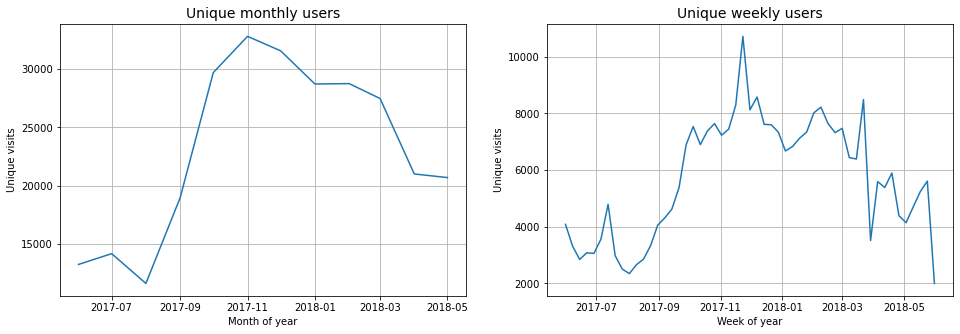

Mean monthly users: 23228
Mean weekly users: 5724


In [17]:
# plot unique monthly & weekly visitors

fig, axes = plt.subplots(1, 2, figsize=(16, 5))
axes = axes.reshape(-1)
bbox = dict(facecolor='white', edgecolor='black')

axes[0].plot(monthly_users)
axes[0].set_title('Unique monthly users', fontsize=14)
axes[0].set_xlabel('Month of year')
axes[0].set_ylabel('Unique visits')
axes[0].grid(True)

axes[1].plot(weekly_users)
axes[1].set_title('Unique weekly users', fontsize=14)
axes[1].set_xlabel('Week of year')
axes[1].set_ylabel('Unique visits')
axes[1].grid(True)

plt.show()

print('Mean monthly users: {:.0f}'.format(mean_monthly_users))
print('Mean weekly users: {:.0f}'.format(mean_weekly_users))

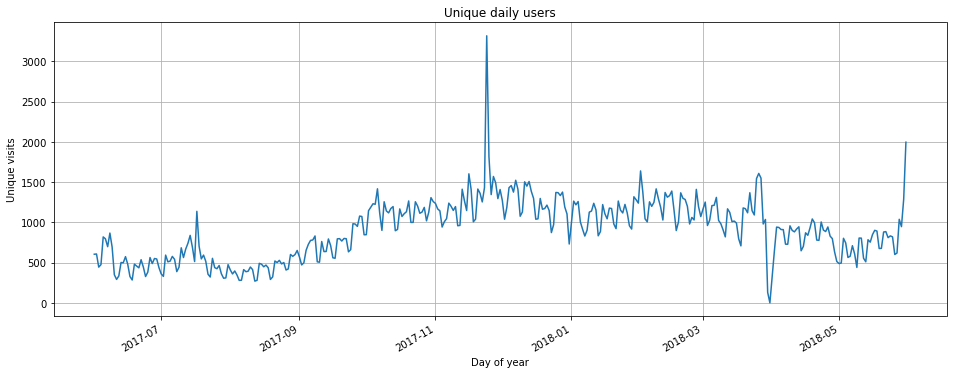

Mean daily users: 908


In [18]:
# plot unique daily visitors

daily_users.plot(title='Unique daily users',
                 xlabel='Day of year',
                 ylabel='Unique visits',
                 grid=True,
                 legend=False,
                 figsize=(16, 6))

plt.show()

print('Mean daily users: {:.0f}'.format(mean_daily_users))

##### Conclusion
Traffic appears to be somewhat seasonsal, peaking from October through December and then bottoming out during June, July, & August. We can also see a few big spikes and dips on the daily chart. Without knowing what the product or website is about, it's impossible to tell why these anomalies occurred. They could be holidays, weather events, natural disasters, or maybe even bot traffic.

#### Daily sessions

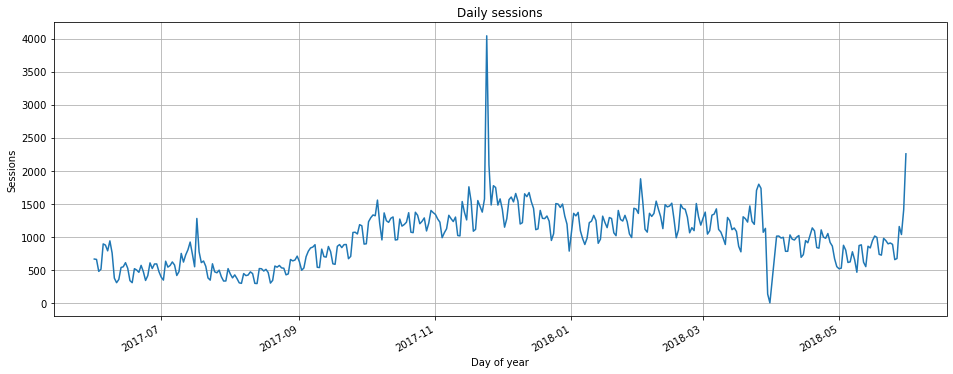

Mean daily sessions: 987


In [19]:
# plot daily sessions

daily_sessions = visits.groupby(['visit_day']).agg({'uid': 'count'})
mean_daily_sessions = daily_sessions['uid'].mean()

daily_sessions.plot(title='Daily sessions',
                    xlabel='Day of year',
                    ylabel='Sessions',
                    grid=True,
                    legend=False,
                    figsize=(16, 6))

plt.show()

print('Mean daily sessions: {:.0f}'.format(mean_daily_sessions))

##### Conclusion
Daily sessions closely mirrors daily unique users. We can see though that the mean number of daily sessions and daily users differs. This means that some users are visiting multiple times per day (greater than 1 session per user).

#### Session durations <a name="step_3_1"></a>

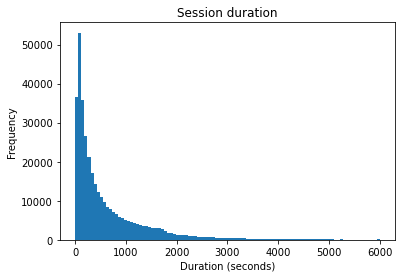

Mode of session durations: 60 seconds
Number of 60-second sessions: 53029


In [20]:
# plot histograms of minutes per month for both plans

visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

filtered_durations = visits.query('session_duration <= 6000')
ax = filtered_durations['session_duration'].plot(kind='hist',
                                            bins=100,
                                            title='Session duration')

ax.set_xlabel('Duration (seconds)')

plt.show()

print('Mode of session durations: {:.0f} seconds'.format(visits['session_duration'].mode()[0]))
print('Number of 60-second sessions: {}'.format(visits.query('session_duration == 60')['session_duration'].count()))

##### Conclusion
The histogram is showing us that the vast majority of sessions last less than ~1750 seconds, or roughly 30 minutes. Most sessions are between 1 and 2 minutes. Maybe visitors have a specific quuestion in mind before visiting, and their question is answered within this time frame. It's important to note that the durations are rounded to the nearest minute (hence the large number of 60-second sessions). Whether or not they're rounded up or down was not provided.

#### Time between visits

In [21]:
# find first visit date & subtract from current session start time

first_visit = visits.groupby(['uid']).agg({'start_ts': 'min'}).reset_index()
first_visit.columns = ['uid', 'first_visit']

visits = visits.merge(first_visit, on='uid')
visits['mins_since_first_visit'] = ((visits['start_ts'] - visits['first_visit']).dt.seconds / 60).astype('int')

visits.head()

,device,end_ts,source_id,start_ts,uid,visit_month,visit_week,visit_day,session_duration,first_visit,mins_since_first_visit
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20 17:20:00,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19 16:53:00,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09 20:05:00,894
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-01,2018-03-08,2018-03-09,1680,2018-03-09 20:05:00,0


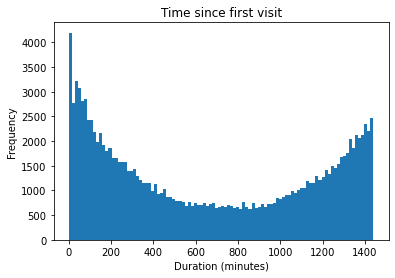

Average time since first visit: 11 hours


In [22]:
# plot histogram with 0 in 'mins_since_first_visit' column filtered out

filtered_mins = visits.query('mins_since_first_visit > 0')
ax = filtered_mins['mins_since_first_visit'].plot(kind='hist',
                                             bins=100,
                                             title='Time since first visit')

ax.set_xlabel('Duration (minutes)')

plt.show()

print('Average time since first visit: {:.0f} hours'.format(filtered_mins['mins_since_first_visit'].mean() / 60))

##### Conclusion
We get an interesting distribution when we plot the duration between any given visit and the user's first visit. While the average is roughly 11 hours, there are two peaks at the extremes. A lot of customers come back within 3 - 4 hours, and a lot of customers come back after around a day.

We need to keep in mind here that 0-minute durations have been filtered out because these represent first visits. All data shown is for durations greater than 0 minutes.

#### When do visitors become buyers? <a name="step_3_2"></a>

It's important to look at how long it takes for a visitor to convert into a customer. We can sort the buyers into cohorts based on the month of their first order, and then look at how long it took each cohort to make a purchase. To get the length of time between first visit and first order, we'll need to find the date that each customer first made an order.

In [23]:
# create Series of first orders

first_order = orders.groupby('uid')['buy_ts'].min()
first_order.name = 'first_order'
first_order.head()

uid
313578113262317    2018-01-03 21:51:00
1575281904278712   2017-06-03 10:13:00
2429014661409475   2017-10-11 18:33:00
2464366381792757   2018-01-28 15:54:00
2551852515556206   2017-11-24 10:14:00
Name: first_order, dtype: datetime64[ns]

Now, we can calculate the number of days between first visits and first purchases. After this, we'll group them into monthly cohort lifetimes.

In [24]:
# join add 'first_orders' column to 'orders'

orders = orders.join(first_order, on='uid')
orders.head()

,buy_ts,revenue,uid,first_order
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00


In [25]:
# new DataFrames for just first visits & just first orders

first_visits_only = visits[['uid', 'first_visit']].drop_duplicates()
first_orders_only = orders[['uid', 'first_order']].drop_duplicates()

In [26]:
# merge the two DataFrames on uid

orders_visits = first_visits_only.merge(first_orders_only, on='uid')
orders_visits.head()

,uid,first_visit,first_order
0,16174680259334210214,2018-03-09 20:05:00,2018-03-09 20:25:00
1,16007536194108375387,2017-09-03 21:35:00,2017-09-04 12:46:00
2,8056418121947262981,2017-06-04 14:17:00,2017-06-25 08:54:00
3,18188358787673499603,2018-02-10 12:17:00,2018-02-12 19:48:00
4,2307401184189569202,2017-09-23 23:27:00,2017-09-27 09:23:00


In [27]:
# get first order & first visit months

orders_visits['first_visit_month'] = orders_visits['first_visit'].astype('datetime64[M]')
orders_visits['first_order_month'] = orders_visits['first_order'].astype('datetime64[M]')

In [28]:
# remove single order in June of 2018

orders_visits = orders_visits.query('first_order_month != "2018-06-01"')

In [29]:
# get number of days between first visit & first order

orders_visits['conversion_lifetime'] = orders_visits['first_order_month'] - orders_visits['first_visit_month']
orders_visits.head()

,uid,first_visit,first_order,first_visit_month,first_order_month,conversion_lifetime
0,16174680259334210214,2018-03-09 20:05:00,2018-03-09 20:25:00,2018-03-01,2018-03-01,0 days
1,16007536194108375387,2017-09-03 21:35:00,2017-09-04 12:46:00,2017-09-01,2017-09-01,0 days
2,8056418121947262981,2017-06-04 14:17:00,2017-06-25 08:54:00,2017-06-01,2017-06-01,0 days
3,18188358787673499603,2018-02-10 12:17:00,2018-02-12 19:48:00,2018-02-01,2018-02-01,0 days
4,2307401184189569202,2017-09-23 23:27:00,2017-09-27 09:23:00,2017-09-01,2017-09-01,0 days


In [30]:
# get cohort lifetime in months

orders_visits['conversion_lifetime'] = orders_visits['conversion_lifetime'] / np.timedelta64(1, 'M')
orders_visits['conversion_lifetime'] = (orders_visits['conversion_lifetime'].round().astype('int'))
orders_visits.head()

,uid,first_visit,first_order,first_visit_month,first_order_month,conversion_lifetime
0,16174680259334210214,2018-03-09 20:05:00,2018-03-09 20:25:00,2018-03-01,2018-03-01,0
1,16007536194108375387,2017-09-03 21:35:00,2017-09-04 12:46:00,2017-09-01,2017-09-01,0
2,8056418121947262981,2017-06-04 14:17:00,2017-06-25 08:54:00,2017-06-01,2017-06-01,0
3,18188358787673499603,2018-02-10 12:17:00,2018-02-12 19:48:00,2018-02-01,2018-02-01,0
4,2307401184189569202,2017-09-23 23:27:00,2017-09-27 09:23:00,2017-09-01,2017-09-01,0


Now we have a **conversion_lifetime** column for each buyer, which is the number of the month of the first purchase relative to the first visit.

In [31]:
# merge with original orders table

orders = orders.merge(orders_visits[['uid', 'first_order_month','conversion_lifetime']], on='uid')
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

orders.head()

,buy_ts,revenue,uid,first_order,first_order_month,conversion_lifetime,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,0,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,0,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,0,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,0,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,0,2017-06-01


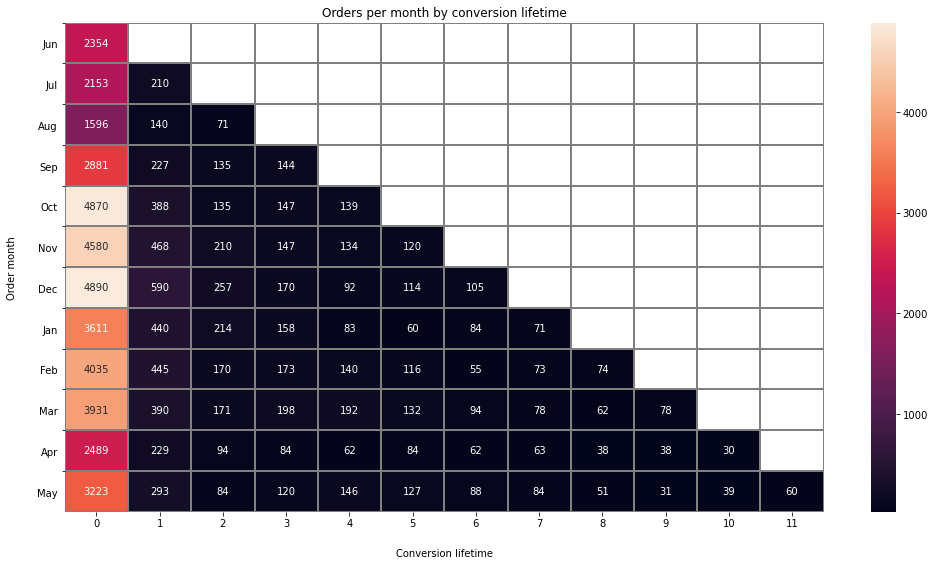

In [32]:
# create heat map showing number of orders for each conversion lifetime based on the order month

group_pivot = orders.pivot_table(index='order_month',
                                 columns='conversion_lifetime',
                                 values='uid',
                                 aggfunc='count')

ticks = ['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May']

plt.figure(figsize=(17, 9))
plt.title('Orders per month by conversion lifetime')

ax = sns.heatmap(group_pivot,
                 annot=True,
                 fmt='.0f',
                 linewidths=1,
                 linecolor='gray')

ax.set_xlabel('Conversion lifetime')
ax.xaxis.labelpad = 20

ax.set_ylabel('Order month')
ax.yaxis.labelpad = 20


ydx = 0/72.; ydy = -21/72

yoffset = matplotlib.transforms.ScaledTranslation(ydx, ydy, fig.dpi_scale_trans)

for label in ax.yaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + yoffset)
    
plt.yticks(range(len(ticks)), ticks)

plt.show()

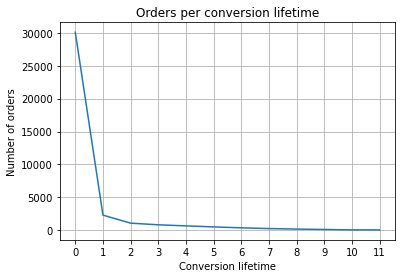

In [33]:
# plot number of orders vs conversion lifetime

group_buys = orders_visits.groupby('conversion_lifetime')['uid'].count().reset_index()
group_buys.columns = ['conversion_lifetime', 'orders']

plt.plot(group_buys['conversion_lifetime'], group_buys['orders'])
plt.title('Orders per conversion lifetime')
plt.ylabel('Number of orders')
plt.xlabel('Conversion lifetime')
plt.xticks(range(0, 12))
plt.grid(True)
plt.show()

##### Conclusion
The majority of purchases occur in Conversion Lifetime 0, meaning that most orders are made within the same month as the first visit. A fair amount of orders are made during the month after the first visit, and for each group after, the number of orders gradually tapers off. We should focus on converting customers shortly after they first visit the site, since they seem to have the highest likelyhood of buying shortly after.

#### How many orders do cohorts make each month?
Next, we'll look at the number of orders made within each cohort by month. This can give us valuable insight into who to target for additional advertisements, offers, coupons, etc. as well as when to target them. First, we need to calculate the cohort lifetime, or time between an order and the first order.

In [34]:
# create 'cohort_lifetime' column

orders['cohort_lifetime'] = orders['order_month'] - orders['first_order_month']

orders['cohort_lifetime'] = orders['cohort_lifetime'] / np.timedelta64(1, 'M')
orders['cohort_lifetime'] = (orders['cohort_lifetime'].round().astype('int'))

orders.head()

,buy_ts,revenue,uid,first_order,first_order_month,conversion_lifetime,order_month,cohort_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,0,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,0,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,0,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,0,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,0,2017-06-01,0


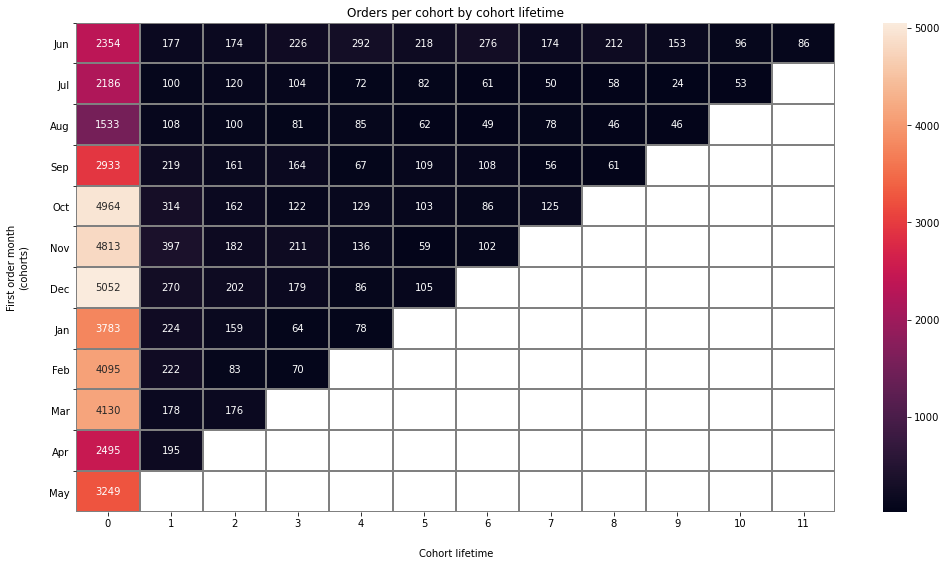

In [35]:
# create heat map showing number of orders for each cohort (first order month) based on the cohort lifetime

group_pivot = orders.pivot_table(index='first_order_month',
                                 columns='cohort_lifetime',
                                 values='uid',
                                 aggfunc='count')

ticks = ['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May']

plt.figure(figsize=(17, 9))
plt.title('Orders per cohort by cohort lifetime')

ax = sns.heatmap(group_pivot,
                 annot=True,
                 fmt='.0f',
                 linewidths=1,
                 linecolor='gray')

ax.set_xlabel('Cohort lifetime')
ax.xaxis.labelpad = 20

ax.set_ylabel('First order month\n(cohorts)')
ax.yaxis.labelpad = 20

ydx = 0/72.; ydy = -21/72

yoffset = matplotlib.transforms.ScaledTranslation(ydx, ydy, fig.dpi_scale_trans)

for label in ax.yaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + yoffset)
    

plt.yticks(range(len(ticks)), ticks)

plt.show()

Not many customers come back the next month to make a purchase again. This is bad news! We can further break this data down by looking at the retention rate from month to month. To get retention rates from month to month, we need to find the initial number of purchases for each cohort and then divide the number for each subsequent month to get the retention rates for each month.

In [36]:
# find intial purchase count

cohorts = (orders.groupby(['first_order_month', 'order_month']).agg({'uid': 'nunique'}).reset_index())

initial_purchase_count = cohorts.query('first_order_month == order_month')[['first_order_month', 'uid']]
initial_purchase_count

,first_order_month,uid
0,2017-06-01,2023
12,2017-07-01,1923
23,2017-08-01,1370
33,2017-09-01,2581
42,2017-10-01,4340
50,2017-11-01,4081
57,2017-12-01,4383
63,2018-01-01,3373
68,2018-02-01,3651
72,2018-03-01,3533


In [37]:
# rename 'uid' column to 'cohort_purchases'

initial_purchase_count.columns = ['first_order_month', 'cohort_purchases']

In [38]:
# join cohort data wiht initial purchase count

cohorts = cohorts.merge(initial_purchase_count, on='first_order_month')

In [39]:
# calculate retention rate

cohorts['retention'] = cohorts['uid'] / cohorts['cohort_purchases']
cohorts.head()

,first_order_month,order_month,uid,cohort_purchases,retention
0,2017-06-01,2017-06-01,2023,2023,1.000000
1,2017-06-01,2017-07-01,61,2023,0.030153
2,2017-06-01,2017-08-01,50,2023,0.024716
3,2017-06-01,2017-09-01,54,2023,0.026693
4,2017-06-01,2017-10-01,88,2023,0.043500


In [40]:
# create 'cohort_lifetime' column

cohorts['cohort_lifetime'] = cohorts['order_month'] - cohorts['first_order_month']

cohorts['cohort_lifetime'] = cohorts['cohort_lifetime'] / np.timedelta64(1, 'M')
cohorts['cohort_lifetime'] = (cohorts['cohort_lifetime'].round().astype('int'))

cohorts.head()

,first_order_month,order_month,uid,cohort_purchases,retention,cohort_lifetime
0,2017-06-01,2017-06-01,2023,2023,1.000000,0
1,2017-06-01,2017-07-01,61,2023,0.030153,1
2,2017-06-01,2017-08-01,50,2023,0.024716,2
3,2017-06-01,2017-09-01,54,2023,0.026693,3
4,2017-06-01,2017-10-01,88,2023,0.043500,4


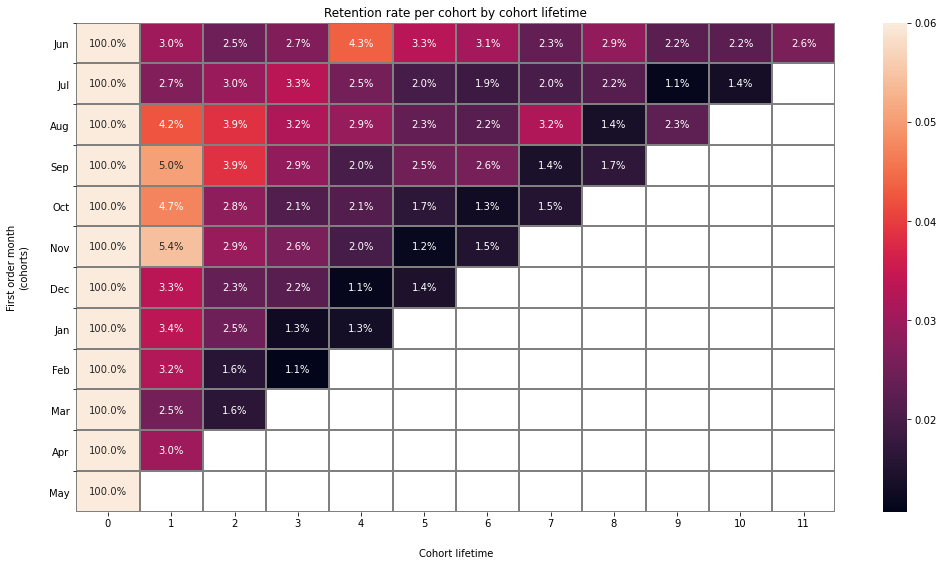

In [41]:
# create heat map showing retention rates for each cohort (first order month) based on the order month

group_pivot = cohorts.pivot_table(index='first_order_month',
                                  columns='cohort_lifetime',
                                  values='retention',
                                  aggfunc='sum')

ticks = ['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May']

plt.figure(figsize=(17, 9))
plt.title('Retention rate per cohort by cohort lifetime')

ax = sns.heatmap(group_pivot,
                 annot=True,
                 fmt='.1%',
                 linewidths=1,
                 linecolor='gray',
                 vmax=0.06)

ax.set_xlabel('Cohort lifetime')
ax.xaxis.labelpad = 20

ax.set_ylabel('First order month\n(cohorts)')
ax.yaxis.labelpad = 20

ydx = 0/72.; ydy = -21/72

yoffset = matplotlib.transforms.ScaledTranslation(ydx, ydy, fig.dpi_scale_trans)

for label in ax.yaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + yoffset)
    
plt.yticks(range(len(ticks)), ticks)

plt.show()

##### Conclusion


Considerably more people come back the next month to make another order when they first make a purchase in August, September, October, or November. Maybe they like the product enough to buy their friends or family a gift for the holidays.

It's worth noting that the chart can be misleading due to the heatmap scaling. There is a lot of room for improvement, as these numbers are still relatively low. The highest retention was 5.4% for Decemeber when they first bought in November.

#### Average order size for buyers in each cohort by order month

In [42]:
# get the revenue & number of buyer for each cohort & each order month

orders_grouped_by_cohorts = orders.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum', 'uid': 'nunique'}).reset_index()
orders_grouped_by_cohorts.head(10)

,first_order_month,order_month,revenue,uid
0,2017-06-01,2017-06-01,9557.49,2023
1,2017-06-01,2017-07-01,981.82,61
2,2017-06-01,2017-08-01,885.34,50
3,2017-06-01,2017-09-01,1931.30,54
4,2017-06-01,2017-10-01,2068.58,88
5,2017-06-01,2017-11-01,1487.92,67
6,2017-06-01,2017-12-01,1922.74,62
7,2017-06-01,2018-01-01,1176.56,47
8,2017-06-01,2018-02-01,1119.15,58
9,2017-06-01,2018-03-01,1225.51,45


In [43]:
# create 'revenue_per_buyer' column

orders_grouped_by_cohorts['revenue_per_buyer'] = orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['uid']
orders_grouped_by_cohorts.head()

,first_order_month,order_month,revenue,uid,revenue_per_buyer
0,2017-06-01,2017-06-01,9557.49,2023,4.724414
1,2017-06-01,2017-07-01,981.82,61,16.095410
2,2017-06-01,2017-08-01,885.34,50,17.706800
3,2017-06-01,2017-09-01,1931.30,54,35.764815
4,2017-06-01,2017-10-01,2068.58,88,23.506591


In [44]:
# create 'cohort_lifetime' column

orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['order_month'] - orders_grouped_by_cohorts['first_order_month']

orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'] / np.timedelta64(1, 'M')
orders_grouped_by_cohorts['cohort_lifetime'] = (orders_grouped_by_cohorts['cohort_lifetime'].round().astype('int'))

orders_grouped_by_cohorts.head()

,first_order_month,order_month,revenue,uid,revenue_per_buyer,cohort_lifetime
0,2017-06-01,2017-06-01,9557.49,2023,4.724414,0
1,2017-06-01,2017-07-01,981.82,61,16.095410,1
2,2017-06-01,2017-08-01,885.34,50,17.706800,2
3,2017-06-01,2017-09-01,1931.30,54,35.764815,3
4,2017-06-01,2017-10-01,2068.58,88,23.506591,4


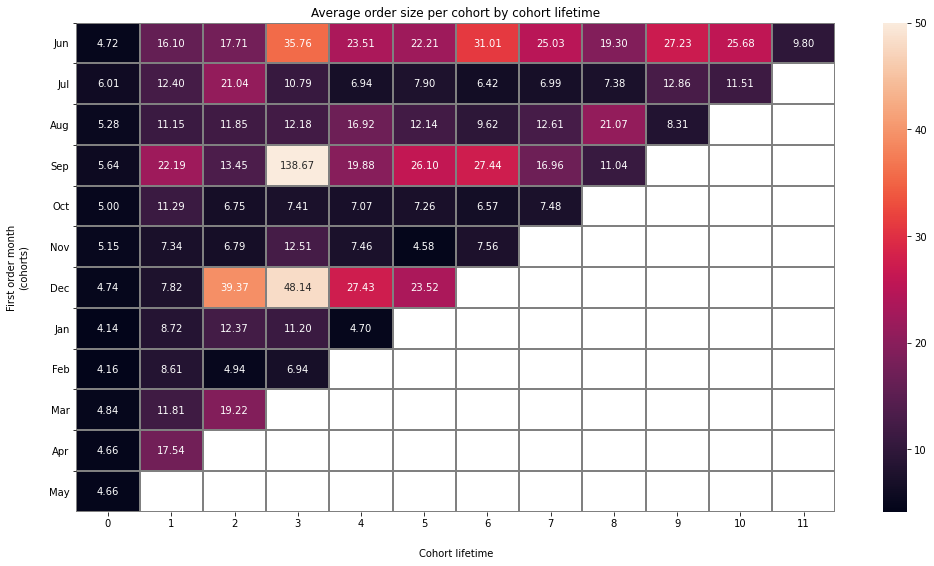

In [45]:
# create new heat map with average size of orders in each cohort by order month

revenue_pivot = orders_grouped_by_cohorts.pivot_table(index='first_order_month',
                                                      columns='cohort_lifetime',
                                                      values='revenue_per_buyer',
                                                      aggfunc='mean')

plt.figure(figsize=(17, 9))
plt.title('Average order size per cohort by cohort lifetime')

ax = sns.heatmap(revenue_pivot,
                 annot=True,
                 fmt='.2f',
                 linewidths=1,
                 linecolor='gray',
                 vmax=50)

ax.set_xlabel('Cohort lifetime')
ax.xaxis.labelpad = 20

ax.set_ylabel('First order month\n(cohorts)')
ax.yaxis.labelpad = 20

ydx = 0/72.; ydy = -20/72

yoffset = matplotlib.transforms.ScaledTranslation(ydx, ydy, fig.dpi_scale_trans)

for label in ax.yaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + yoffset)
    
plt.yticks(range(len(ticks)), ticks)

plt.show()

##### Conclusion

On average, order sizes are bigger when they are made during the months following the customer's first order. We should focus marketing efforts on repeat customers and, as mentioned earlier, increasing the retention rate from month to month. This should really help drive extra revenue and profit.

#### Lifetime value analysis <a name="step_3_3"></a>

It's of great interest to the marketing team to calculate the liftime value (LTV) of each cohort. This, coupled with the customer acquisition cost (CAC), can give us insight on wheter or not our marketing expenses are providing us with a ROI or costing us more than we're bringing in.

In [46]:
# unique buyers per cohort

cohort_sizes = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [47]:
# sum of revenues by cohort & order month

cohorts = orders.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [48]:
# merge with number of buyers on order month

report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [49]:
# add age column to 'report'

report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

In [50]:
# calculate LTV

report['ltv'] = report['revenue'] / report['n_buyers']
report.head()

,first_order_month,n_buyers,order_month,revenue,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531


In [51]:
# pivot table with LTVs for each cohort

output = report.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean').round(2)

In [52]:
# cumulativelty sum revenues for each cohort across entire cohort lifetime

ltv = output.cumsum(axis=1)
ltv.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.44,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.51,7.67,7.79,7.93,8.09,8.24,8.4,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.37,7.58,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.43,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.07,6.22,6.27,6.38,,,,,
2017-12-01,4.74,5,5.93,7,7.31,7.65,,,,,,
2018-01-01,4.14,4.43,4.73,4.87,4.93,,,,,,,
2018-02-01,4.16,4.44,4.52,4.59,,,,,,,,


##### Conclusion <a name="step_3_3_1"></a>

The September cohort has the highest LTV, closely followed by the June cohort. It makes sense that June would have a higher LTV since customers from this cohort had more time to make additional orders. It's also interesting that the September cohort came out on top. This could be because the holidays were coming up and people who bought in September felt inclined to share the product with their friends and families as gifts.

The December cohort also performed remarkably well given how much less time those in this cohort had to make purchases (we only have data for 6 months after December vs 12 month after the first June cohort). Holidays seem to influence buyers of this product significantly. It only makes sense to allocate additional marketing resources around this time of the year.

#### How much are we spending on ads?
Next, we'll take a look at marketing expenses. We'll group costs into 3 categories: Overall, Per source, and Over time. Then we'll visualze this data with various plots to form an easily-digestible conclusion.

In [53]:
# add all marketing costs for the entire year

overall_costs = costs['costs'].sum()
print('Total marketing expense for the year: ${}'.format(overall_costs))

Total marketing expense for the year: $329131.62


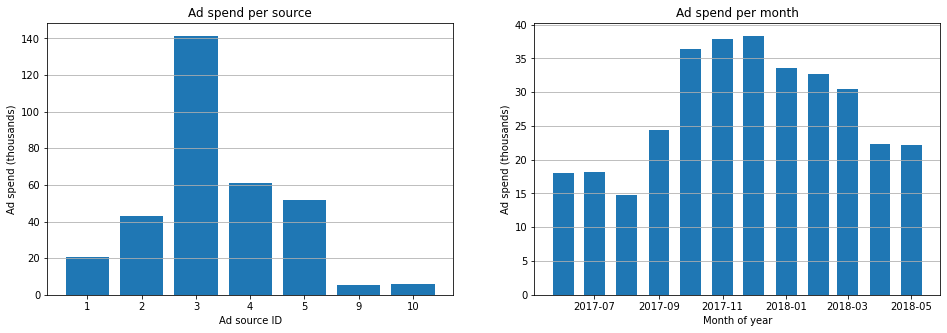

In [54]:
# marketing costs per source & month of year

source_costs = costs.groupby(['source_id']).agg({'costs': 'sum'}).reset_index()

costs['month'] = costs['dt'].astype('datetime64[M]')
monthly_costs = costs.groupby(['month']).agg({'costs': 'sum'}).reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 5))
axes.reshape(-1)

axes[0].bar(source_costs.index, source_costs['costs'] / 1000, tick_label=[1, 2, 3, 4, 5, 9, 10])
axes[0].set_title('Ad spend per source')
axes[0].set_xlabel('Ad source ID')
axes[0].set_ylabel('Ad spend (thousands)')
axes[0].yaxis.grid(True)

axes[1].bar(x=monthly_costs['month'], height=monthly_costs['costs'] / 1000, width=20)
axes[1].set_title('Ad spend per month')
axes[1].set_xlabel('Month of year')
axes[1].set_ylabel('Ad spend (thousands)')
axes[1].yaxis.grid(True)

plt.show()

##### Conclusion
Looking back at our traffic, it appears as if ad spend and traffic are directly related. The number of visitors goes up when we spend more on advertising. Maybe it would make sense to look into unpaid traffic sources such as search engine traffic in order to diversify sources.

We also spend a disproportionate amount on ad source 3. Whether or not this is a good move is yet to be determined. Maybe other ad sources provide a better ROMI. If that is the case, we should spend more on ads from these sources.

#### Customer acquisition cost (CAC) by source

In [55]:
# find the ad sources that paying customers first visited through

first_sources = visits.sort_values(by='start_ts', ascending=True).groupby('uid', as_index=False).agg({'source_id': 'first'})
orders = orders.merge(first_sources, on='uid', how='left')

orders.head()

,buy_ts,revenue,uid,first_order,first_order_month,conversion_lifetime,order_month,cohort_lifetime,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,0,2017-06-01,0,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,0,2017-06-01,0,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,0,2017-06-01,0,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,0,2017-06-01,0,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,0,2017-06-01,0,3


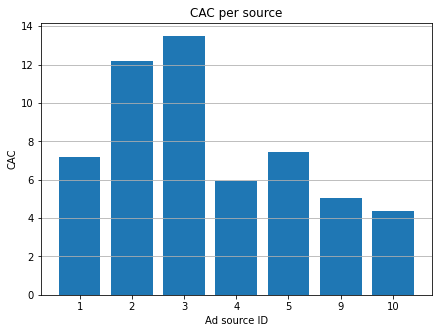

In [56]:
# get number of customers by source, cost by source, merge, & plot CAC

source_orders = orders.groupby('source_id')['uid'].nunique().reset_index()
source_costs = costs.groupby('source_id')['costs'].sum().reset_index()

source_cac = source_orders.merge(source_costs, on='source_id')
source_cac['cac'] = source_cac['costs'] / source_cac['uid']
source_cac

fig, ax = plt.subplots(figsize=(7, 5))

ax.bar(x=source_cac.index, height=source_cac['cac'], tick_label=[1, 2, 3, 4, 5, 9, 10])
ax.set_title('CAC per source')
ax.set_xlabel('Ad source ID')
ax.set_ylabel('CAC')
ax.yaxis.grid(True)

##### Conclusion
Ad source 3 is the most expensive when it comes to acquiring customers, at nearly $14 per customer. Ad source 2 is also pretty pricey at $12. Maybe we should look into other, less expensive ad sources. To find out whether or not this is a good idea, we still need to calculate ROI for each one. If the ROI is worse for a cheaper ad source, then it may not be a good idea to commit resources towards that ad source.

#### Customer acquisition by device

In [57]:
# find the devices that paying customers first visited on

first_devices = visits.sort_values(by='start_ts', ascending=True).groupby('uid', as_index=False).agg({'device': 'first'})
orders = orders.merge(first_devices, on='uid', how='left')

orders.head()

,buy_ts,revenue,uid,first_order,first_order_month,conversion_lifetime,order_month,cohort_lifetime,source_id,device
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,0,2017-06-01,0,1,desktop
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,0,2017-06-01,0,2,desktop
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,0,2017-06-01,0,2,desktop
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,0,2017-06-01,0,2,desktop
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,0,2017-06-01,0,3,desktop


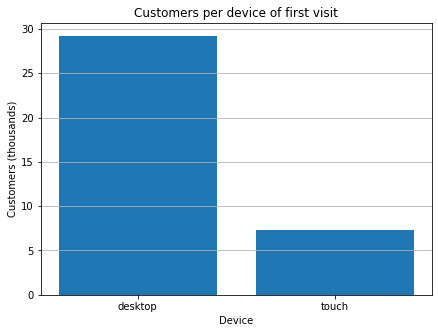

In [58]:
# plot the number of customers by the device they used when they first visited the store

buyers_devices = orders.groupby('device')['uid'].nunique().reset_index()

fig, ax = plt.subplots(figsize=(7, 5))

ax.bar(x=buyers_devices['device'], height=buyers_devices['uid'] / 1000)
ax.set_title('Customers per device of first visit')
ax.set_xlabel('Device')
ax.set_ylabel('Customers (thousands)')
ax.yaxis.grid(True)

##### Conclusion
The vast majority of customers first visit through the desktop website. We should focus marketing efforts on desktop visitors since they're the ones most likely to become buyers.

#### Return on marketing investment (ROMI)
We need to determine if the cost of acquiring these customers is justified. We'll compare the LTV of customers from each source with the CAC for each source and see if the marketing investments paid off.

In [59]:
# unique buyers per source

source_sizes = orders.groupby('source_id').agg({'uid': 'nunique'}).reset_index()
source_sizes.columns = ['source_id', 'n_buyers']
source_sizes.head()

,source_id,n_buyers
0,1,2899
1,2,3506
2,3,10473
3,4,10295
4,5,6931


In [60]:
# sum of revenues by cohort & order month

source_cohorts = orders.groupby(['source_id', 'order_month']).agg({'revenue': 'sum'}).reset_index()
source_cohorts.head()

,source_id,order_month,revenue
0,1,2017-06-01,1378.70
1,1,2017-07-01,1581.68
2,1,2017-08-01,1441.49
3,1,2017-09-01,3071.61
4,1,2017-10-01,3621.82


In [61]:
# merge with number of buyers on order month

source_report = pd.merge(source_sizes, source_cohorts, on='source_id')
source_report.head()

,source_id,n_buyers,order_month,revenue
0,1,2899,2017-06-01,1378.70
1,1,2899,2017-07-01,1581.68
2,1,2899,2017-08-01,1441.49
3,1,2899,2017-09-01,3071.61
4,1,2899,2017-10-01,3621.82


In [62]:
# calculate LTV

source_report['ltv'] = source_report['revenue'] / source_report['n_buyers']
source_report.head()

,source_id,n_buyers,order_month,revenue,ltv
0,1,2899,2017-06-01,1378.70,0.475578
1,1,2899,2017-07-01,1581.68,0.545595
2,1,2899,2017-08-01,1441.49,0.497237
3,1,2899,2017-09-01,3071.61,1.059541
4,1,2899,2017-10-01,3621.82,1.249334


In [63]:
# pivot table with LTVs for each source

output = source_report.pivot_table(index='source_id', columns='order_month', values='ltv', aggfunc='mean').round(2)

In [64]:
# cumulativelty sum revenues for each source across entire lifetime

source_ltv = output.cumsum(axis=1)['2018-05-01'].reset_index().dropna()
source_ltv.columns = ['source_id', 'ltv']
source_ltv

,source_id,ltv
0,1,10.73
1,2,13.39
2,3,5.21
3,4,5.50
4,5,7.59
6,9,5.28
7,10,3.34


In [65]:
source_romi = source_ltv.merge(source_cac[['cac', 'source_id']], on='source_id')
source_romi['romi'] = source_romi['ltv'] / source_romi['cac']
source_romi

,source_id,ltv,cac,romi
0,1,10.73,7.186364,1.493105
1,2,13.39,12.209367,1.096699
2,3,5.21,13.493901,0.386100
3,4,5.50,5.932356,0.927119
4,5,7.59,7.467479,1.016407
5,9,5.28,5.071222,1.041169
6,10,3.34,4.381106,0.762365


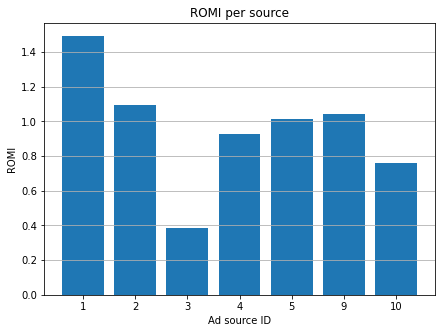

In [66]:
# plot ROMI by ad source

fig, ax = plt.subplots(figsize=(7, 5))

ax.bar(x=source_romi.index, height=source_romi['romi'], tick_label=[1, 2, 3, 4, 5, 9, 10])
ax.set_title('ROMI per source')
ax.set_xlabel('Ad source ID')
ax.set_ylabel('ROMI')
ax.yaxis.grid(True)

##### Conclusion
Ad source 3 has a ROMI well below 1, meaning that for the amount we spend on ads from this source, we never saw a retrun on investment in the time period we analyzed. In fact, every other source other than 3 will provide a much better result. This is worrying because we spend the most money on this source and it simply doesn't pay off.

Ad source 1 should be our number one priority moving forward since it has the highest ROI, followed by ad source 2. Sources 3, 10, and 4 should be avoided, since they didn't provide a return and we ultimately spent more money than we earned from customers acquired by these sources.

### Step 5: Key takeaways

#### Traffic & sessions
- Traffic peaked during the holidays and remained stron the first few months of the year
- Monthly traffic is directly correleted with ad spend for each month
- Most session durations are roughly 1-2 minutes
- On average, repeat visitors return 11 hours after their first visit

- ##### Suggestions
    - Look into other traffic sources such as search engines, emails, referrals, etc. Diversified traffic is never a bad idea.

#### Conversions & retention
- The vast majority of buyers convert in the same month as their first visit
- Barely any visitors convert after one month past their first visit
- Retention rates are much higher just before the holidays - customers may be sharing the product as a gift after a personal purchase
- Overall, retention rates are still low with a maximum of 5-6% the month after the first purchase
- Order sizes are bigger when they are made during the months following the customer's first order

- ##### Suggestions
    - Focus on boosting retention by offering coupons to first time buyers, or building an email list to foster additional purchases
    
#### LTV, ROMI, & devices
 - We spend the most on ad source 3
 - Ad sources 2 and 3 also cost us the most per customer acquisition
 - Most customers visit first by desktop (nearly 4x as much as touch devices)
 - Ad sources 3, 4 and 10 did not provide an ROI, with 3 being the worst ROI
 - Ad source 1 provided the best ROI, followed by source 2
 
 - ##### Suggestions
     - Stop using Ad sources 3, 4, and 10 for traffic immediately
     - Allocate more ad spend to sources 1 and 2
     - Focus marketing efforts and ads on desktop versions of the site vs mobile or tablet